# Predicting Student Success

---
Name : Darryn Johnson

Date : 10/23/2024

Instructor : Mark Barbour

Blog : 

Pace : flexce : FLEX

---
## Sources and Links 

- Github Repository : [predicting_studnet_success](https://github.com/Djohnson1313/predicting_student_success)

- Presentation Link :

- Link to dataset metadata :[dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)

- Original Kaggle Data Set : [Predict Students Dropout and Academic Success](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success)

- `CHRISP-DM` explination and image : [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

---
# Overview

- title
    - author information
        - author name
        - date last updated
        - instructor
        - blog link
        - student pace
- sources and links
- imports
- business understanding
- data understanding
- data distribution
- data preparation
- methodoligy
- functions
- exploritory data analysis
- model preparation
- modeling
- the final model
- conclusion 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
confusion_matrix, ConfusionMatrixDisplay,
precision_score, recall_score, 
accuracy_score, f1_score)
from sklearn.pipeline import Pipeline

import warnings
#warnings.filterwarnings('ignore')

---
# Business Understanding

The purpose of the follwing notebook is for a school or a scholoship benefactor to be able to identify studnets who potentially may dropout of school and assist those students with ensuring their success. This can be done from the schools perspective by giving the student additional assitance with learning by allocating more resources to the student. Some examples could include tutoring, after school programs, therapy, etc.. From the benefactors perspective they could help students struggling financially or with a home life that doesnt bolster academic success by targeting them and insuring they recieve the proper funds they need to succeed.  

- business objectives
    - predict if a student will graduate or dropout
        - success is classyifing a student correctly a majority of the time
- situation assesment
    - resources available
        - personal individual data
    - resources un-available
        - grades of enrolled students
- data mining goals
    - assess and understand the data provided
- project plan
    - produce a usable and reliable prediction model given the accessable information  

---
# Data Understanding 

The data we have here is a dataset from [Kaggle](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success). This data was collected with the intention of predicting the success of a student based on important demographic, academic, and socio-economic factors, which are crucial for predicting a student's academic outcome.

The data is as follows : 

- data properties
    - the original data set contains 4424 entries, with each entry being an anonymized student or applicant
    - the original data set contains 37 columns.
        - a breakdown of these columns is available in [dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)
     
Let's take a look into the data we have.

In [2]:
df = pd.read_csv('predict_student_success_data.csv', sep = ";")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
#df.info()

In [5]:
#df.isna().sum()

---
# Data Distribution

Here we will look into the distribution of our data. we can see that a majority of our targets are graduates, with dropouts trailing not far behined. More then likely, enrolled will not be used in the modeling process as this model will not be predicting that.

<div>
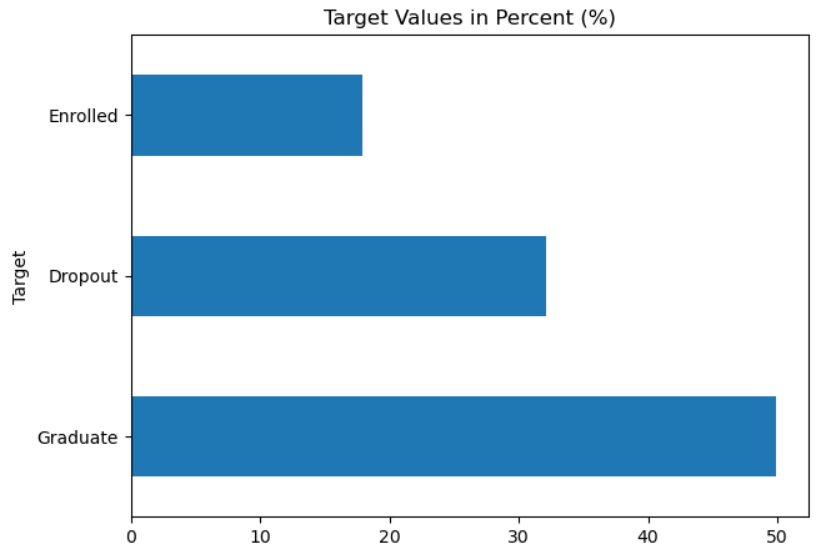
</div>

---
# Data Preparation

In [6]:
df = df.rename(columns = {'Nacionality' : 'Nationality'})

In [7]:
df['Nationality'] = df['Nationality'].replace({6 : 3,11 : 4,13 : 5,14 : 6,17 : 7,21 : 8,22 : 9,24 : 10,25 : 11,26 : 12,32 : 13,
                                               41 : 14,62 : 15,100 : 16,101 : 17, 103 : 18,105 : 19,108 : 20,109 : 21 }) 

---
## Methodoligy

A common methodology used when attempting to create a model is `CRISP-DM`, which stands for:

- `CR`oss
- `I`dustry
- `S`tandard
- `p`rocess
- (for)
- `D`ata
- `M`ining

A good visual for how this works is a model designed by [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

<div>
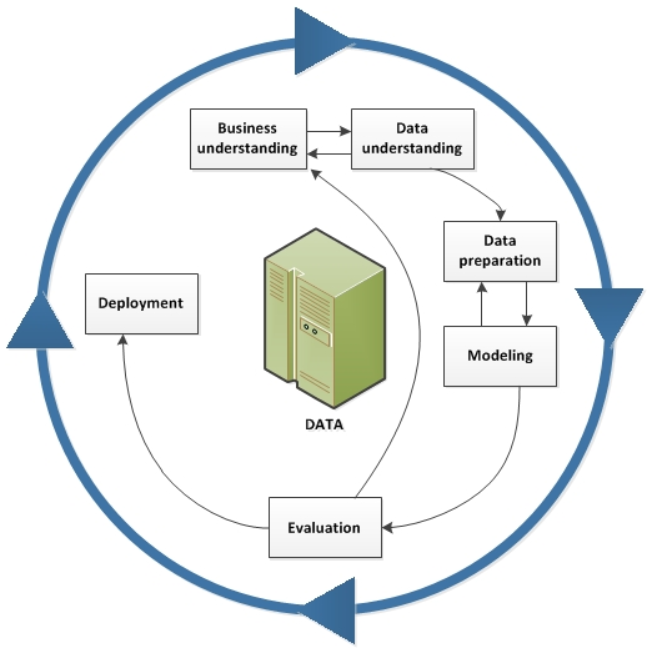
</div>

This methodolgy is an overarhcing workflow style, where upon completing a step in the cycle, the next step is started and so on. Where this model really helps though is that its not linear, meaning if needed, returning to a previous step can assist with assuring a thorough and complete modeling process.

---
# Functions

Here we create some handmade functions to assist with repetitive code blocks. If a code block / section uses a handmade function, there will be a note indicating which one and its purpose.

In [8]:
def get_metrics(y_train, pred):
    '''
    bundles together accuracy, precision, recall and f1 score into one function.
    
    requirements : this function requires 2 inputs, the y_values as dtype(object) and pred as dtype(numpy.ndarry)
    '''   
    
    acc = accuracy_score(y_train, pred)
    prec = precision_score(y_train, pred, average = 'macro', zero_division = np.nan)
    rec = recall_score(y_train, pred, average = 'macro')
    f1 = f1_score(y_train, pred, average = 'macro')
    print('accuracy:', acc)
    print('precision:', prec)
    print('recall:', rec)
    print('f1 score:', f1)

---
# Exploritory Data Analysis (EDA)

Lets dive more into the data we have, and se if we can get a base understanding of what we're working with. This step assists us with the modeling phase, as it allows us to have a deeper understanding of what the results may look like.

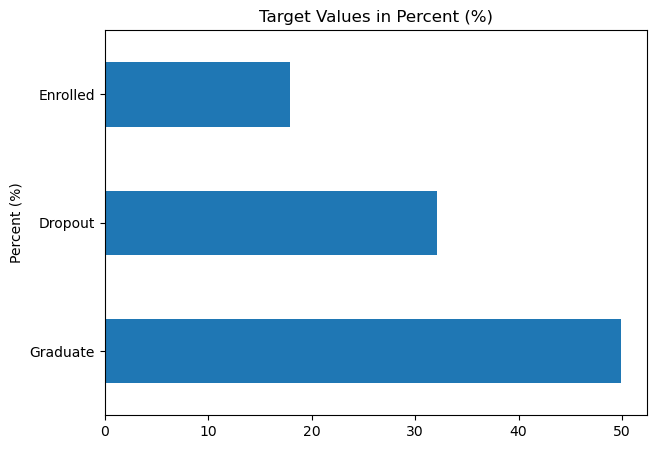

In [9]:
fig, ax = plt.subplots(figsize = (7,5))
target_bar = df['Target'].value_counts(normalize = True) * 100
target_bar.plot(kind = 'barh', rot = 'horizontal')
ax.set_title('Target Values in Percent (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [10]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

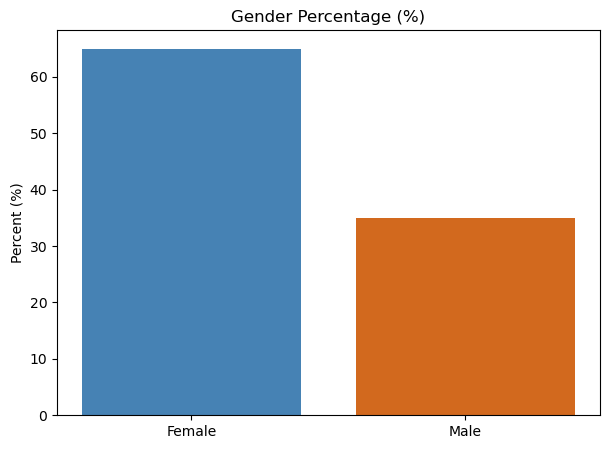

In [11]:
fig, ax = plt.subplots(figsize = (7,5))

categories = ['Female', 'Male']
vals = [65, 35]
colors = ['steelblue', 'chocolate']
plt.bar(categories, vals, color = colors)
ax.set_title('Gender Percentage (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [12]:
df['Gender'].value_counts()

Gender
0    2868
1    1556
Name: count, dtype: int64

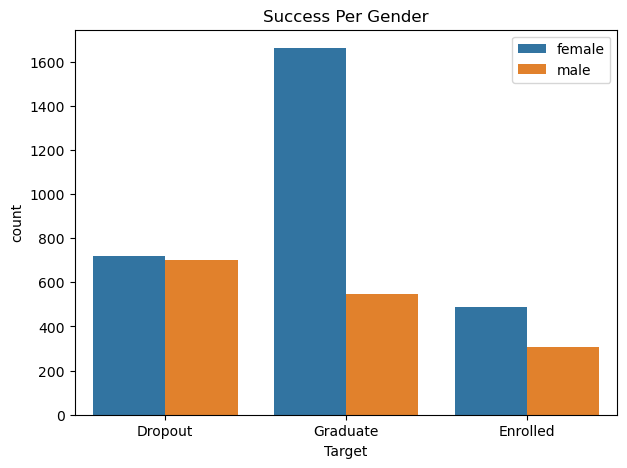

In [13]:
fig, ax = plt.subplots(figsize = (7, 5)) # create figure
sns.countplot(data = df, x = 'Target', hue = 'Gender') # assigns x and y values
ax.set_title('Success Per Gender') # title
labels = ['female', 'male']
plt.legend(labels)
plt.show(); # output

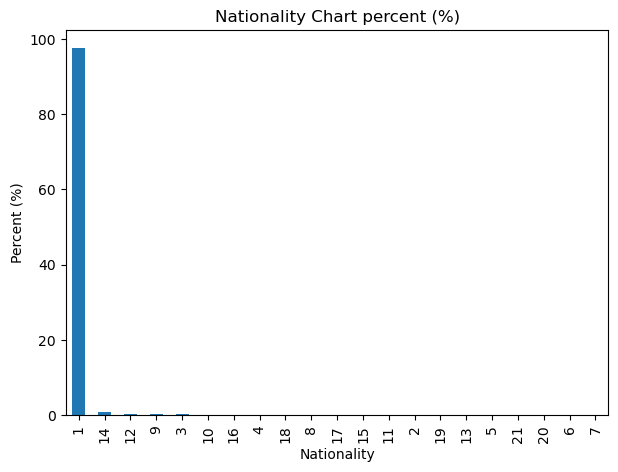

In [14]:
fig, ax = plt.subplots(figsize = (7,5))
nat_bar = df['Nationality'].value_counts() / len(df['Nationality']) * 100
nat_bar.plot(kind = 'bar')
ax.set_title('Nationality Chart percent (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [15]:
len(df['Nationality'])

4424

In [16]:
(4314 / 4424) * 100

97.51356238698011

---
# Model Preparation

grad = 1

In [17]:
df.drop(df[df['Target'] == 'Enrolled'].index, inplace = True)

In [18]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [19]:
le = LabelEncoder()
seed = 13
df['Target'] = le.fit_transform(df['Target'])

y = df['Target']
x = df.drop(columns = 'Target', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed)

---
# Modeling

In [20]:
rf = RandomForestClassifier(random_state = seed)

In [21]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=13)

In [22]:
pred_rf = rf.predict(x_test)

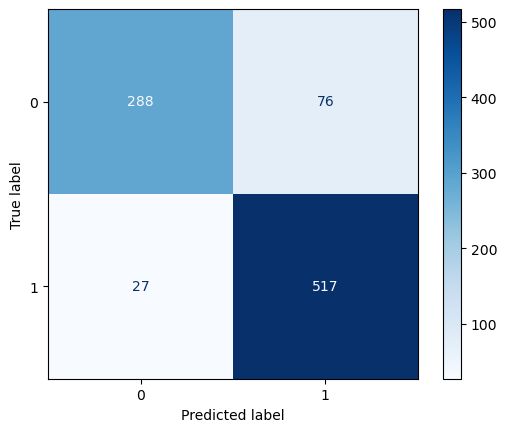

In [23]:
cnf_matrix = confusion_matrix(y_test, pred_rf) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf.classes_) # create plot
disp.plot(cmap=plt.cm.Blues) # output

In [24]:
get_metrics(y_test, pred_rf)

accuracy: 0.8865638766519823
precision: 0.8930619127920982
recall: 0.8707882191338073
f1 score: 0.8788585314168101


In [25]:
pipe = Pipeline([('rfc', RandomForestClassifier(random_state = seed))])

params = [{'rfc__n_estimators' : (300, 400, 1000),
          'rfc__max_depth' : (10, 50, 100),
          'rfc__criterion' : ('gini', 'entropy'),
          'rfc__max_features' : (10, 50, 100)}]

grid = GridSearchCV(pipe, params)

In [26]:
#grid.fit(x_train, y_train)

In [27]:
#grid.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 50,
 'rfc__max_features': 10,
 'rfc__n_estimators': 400}

In [28]:
rf1 = RandomForestClassifier(random_state = seed, criterion = 'entropy', 
                             max_depth = 50, max_features = 10, n_estimators = 400)

In [29]:
rf1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=10,
                       n_estimators=400, random_state=13)

In [30]:
pred_rf1 = rf1.predict(x_test)

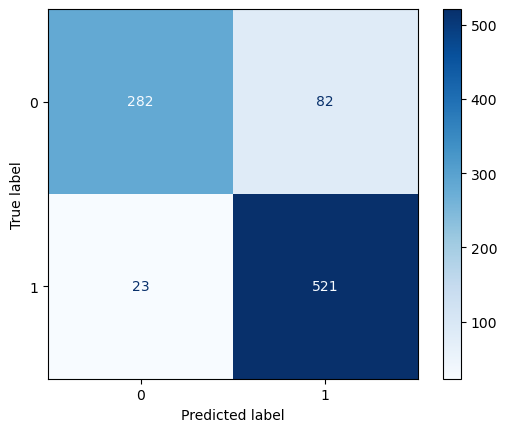

In [31]:
cnf_matrix = confusion_matrix(y_test, pred_rf1) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf1.classes_) # create plot
disp.plot(cmap=plt.cm.Blues) # output

In [32]:
get_metrics(y_test, pred_rf1)

accuracy: 0.8843612334801763
precision: 0.8943017154663839
recall: 0.8662229314802845
f1 score: 0.8757530856474876


In [33]:
rf1.feature_importances_

array([0.0020041 , 0.01518732, 0.01047663, 0.03176391, 0.00113858,
       0.00372016, 0.0263859 , 0.00193354, 0.01262146, 0.01362775,
       0.01392199, 0.01794228, 0.03261235, 0.00582599, 0.00045059,
       0.00930068, 0.0538438 , 0.00627598, 0.01459488, 0.02702809,
       0.00095328, 0.0055567 , 0.02257202, 0.02202909, 0.12644189,
       0.06004929, 0.00296415, 0.0045881 , 0.02409088, 0.02538513,
       0.24940737, 0.10776605, 0.00230394, 0.01487123, 0.01397644,
       0.01638845])

In [34]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(7,6))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

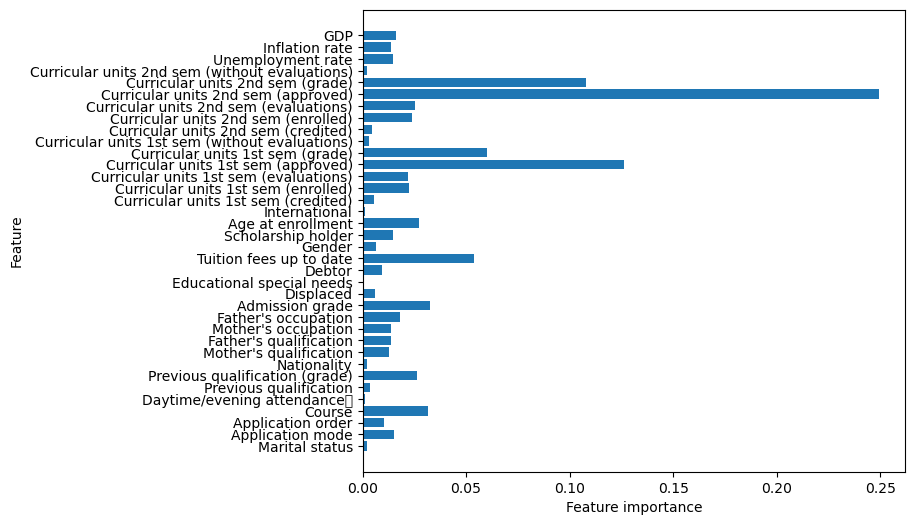

In [35]:
plot_feature_importances(rf1)

---
# The final Model

---
# Conclusion